In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,MaxAbsScaler,OneHotEncoder,StandardScaler
import re
import random

In [4]:
df = pd.read_csv("all_energy_statistics.csv")
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
1189477,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
1189478,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
1189479,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
1189480,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


In [60]:
len(df.country_or_area.unique())

243

In [45]:
df_france = df[df["country_or_area"] == "France"]

In [46]:
df_france.count()
# country_or_area = 890 valeurs uniques
# category = 58 valeurs uniques
# unit = 6


country_or_area          17236
commodity_transaction    17236
year                     17236
unit                     17236
quantity                 17236
quantity_footnotes         977
category                 17236
dtype: int64

In [47]:
df_france = df_france.drop(columns='quantity_footnotes')
df_france

,country_or_area,commodity_transaction,year,unit,quantity,category
26,France,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",119.0,additives_and_oxygenates
27,France,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",102.0,additives_and_oxygenates
28,France,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",62.0,additives_and_oxygenates
29,France,Additives and Oxygenates - Exports,2011,"Metric tons, thousand",55.0,additives_and_oxygenates
30,France,Additives and Oxygenates - Exports,2010,"Metric tons, thousand",87.0,additives_and_oxygenates
...,...,...,...,...,...,...
1188554,France,Electricity - total wind production,1997,"Kilowatt-hours, million",11.0,wind_electricity
1188555,France,Electricity - total wind production,1996,"Kilowatt-hours, million",7.0,wind_electricity
1188556,France,Electricity - total wind production,1995,"Kilowatt-hours, million",5.0,wind_electricity
1188557,France,Electricity - total wind production,1994,"Kilowatt-hours, million",5.0,wind_electricity


In [55]:
df_france.commodity_transaction.unique()

array(['Additives and Oxygenates - Exports',
       'Additives and Oxygenates - Imports',
       'Additives and Oxygenates - Production',
       'Additives and Oxygenates - Stock changes',
       'Additives and Oxygenates - Total energy supply',
       'Additives and Oxygenates - transfers and recycled products',
       'Additives and Oxygenates - Transformation',
       'Additives and Oxygenates - Transformation in oil refineries',
       'Animal waste - Consumption by manufacturing, construction and non-fuel industry',
       'Animal waste - Consumption by other manuf., const. and non-fuel min. ind.',
       'Animal waste - Consumption not elsewhere specified (industry)',
       'Animal waste - Final consumption',
       'Animal waste - Final energy consumption',
       'Animal waste - Production', 'Animal waste - Total energy supply',
       'Aviation gasoline - Consumption by other',
       'Aviation gasoline - Consumption by transport',
       'Aviation gasoline - Consumption in d

In [53]:
production_list = [i for i in df_france.commodity_transaction.unique() if re.search("Production", i)]
len(production_list)
production_list


['Additives and Oxygenates - Production',
 'Animal waste - Production',
 'Aviation gasoline - Production',
 'Bagasse - Production',
 'Biodiesel - Production',
 'Biogases - Production',
 'Bitumen - Production',
 'Black Liquor - Production',
 'Blast Furnace Gas - Production',
 'Charcoal - Production',
 'Coal Tar - Production',
 'Coke Oven Gas - Production',
 'Ethane - Production',
 'Ethane - Production from plants',
 'Ethane - Production from refineries',
 'Fuel oil - Production',
 'Fuelwood - Production',
 'Gas Oil/ Diesel Oil - Production',
 'Industrial Waste - Production',
 'Kerosene-type Jet Fuel - Production',
 'Lignite - Production',
 'Liquefied petroleum gas (LPG) - Production',
 'Lubricants - Production',
 'Motor Gasoline - Production',
 'Municipal Wastes - Production',
 'Naphtha - Production',
 'Natural gas liquids - Production',
 'Other kerosene - Production',
 'Other oil products n.e.c. - Production',
 'Vegetal waste - Production',
 'Paraffin waxes - Production',
 'Petroleum c

In [119]:
production_list = [i for i in df_france.commodity_transaction.unique() if re.search("Exports", i)]
len(production_list)
production_list

['Additives and Oxygenates - Exports',
 'Aviation gasoline - Exports',
 'Biodiesel - Exports',
 'Bitumen - Exports',
 'Charcoal - Exports',
 'Fuel oil - Exports',
 'Gas Oil/ Diesel Oil - Exports',
 'Kerosene-type Jet Fuel - Exports',
 'Liquefied petroleum gas (LPG) - Exports',
 'Lubricants - Exports',
 'Motor Gasoline - Exports',
 'Naphtha - Exports',
 'Other kerosene - Exports',
 'Other oil products n.e.c. - Exports',
 'Paraffin waxes - Exports',
 'Petroleum coke - Exports',
 'White spirit and special boiling point industrial spirits - Exports']

In [57]:
nuclear_list = [i for i in df_france.commodity_transaction.unique() if re.search("nuclear", i)]
nuclear_list

['Electricity - net installed capacity of electric power plants, public nuclear',
 'Electricity - total net installed capacity of electric power plants, nuclear',
 'Electricity - total nuclear production',
 'Electricity - Own use by nuclear fuel extraction and processing']

In [65]:
df_france_nuclear_production = df_france[df_france["commodity_transaction"] == 'Electricity - total nuclear production']
df_france_nuclear_production


,country_or_area,commodity_transaction,year,unit,quantity,category
855148,France,Electricity - total nuclear production,2014,"Kilowatt-hours, million",436474.0,nuclear_electricity
855149,France,Electricity - total nuclear production,2013,"Kilowatt-hours, million",423685.0,nuclear_electricity
855150,France,Electricity - total nuclear production,2012,"Kilowatt-hours, million",425406.0,nuclear_electricity
855151,France,Electricity - total nuclear production,2011,"Kilowatt-hours, million",442383.0,nuclear_electricity
855152,France,Electricity - total nuclear production,2010,"Kilowatt-hours, million",428521.0,nuclear_electricity
855153,France,Electricity - total nuclear production,2009,"Kilowatt-hours, million",409736.0,nuclear_electricity
855154,France,Electricity - total nuclear production,2008,"Kilowatt-hours, million",439447.0,nuclear_electricity
855155,France,Electricity - total nuclear production,2007,"Kilowatt-hours, million",439730.0,nuclear_electricity
855156,France,Electricity - total nuclear production,2006,"Kilowatt-hours, million",450191.0,nuclear_electricity
855157,France,Electricity - total nuclear production,2005,"Kilowatt-hours, million",451529.0,nuclear_electricity


([<matplotlib.axis.XTick at 0x12769ab50>,
 [Text(1990, 0, '1990'),
  Text(1991, 0, '1991'),
  Text(1992, 0, '1992'),
  Text(1993, 0, '1993'),
  Text(1994, 0, '1994'),
  Text(1995, 0, '1995'),
  Text(1996, 0, '1996'),
  Text(1997, 0, '1997'),
  Text(1998, 0, '1998'),
  Text(1999, 0, '1999'),
  Text(2000, 0, '2000'),
  Text(2001, 0, '2001'),
  Text(2002, 0, '2002'),
  Text(2003, 0, '2003'),
  Text(2004, 0, '2004'),
  Text(2005, 0, '2005'),
  Text(2006, 0, '2006'),
  Text(2007, 0, '2007'),
  Text(2008, 0, '2008'),
  Text(2009, 0, '2009'),
  Text(2010, 0, '2010'),
  Text(2011, 0, '2011'),
  Text(2012, 0, '2012'),
  Text(2013, 0, '2013'),
  Text(2014, 0, '2014')])

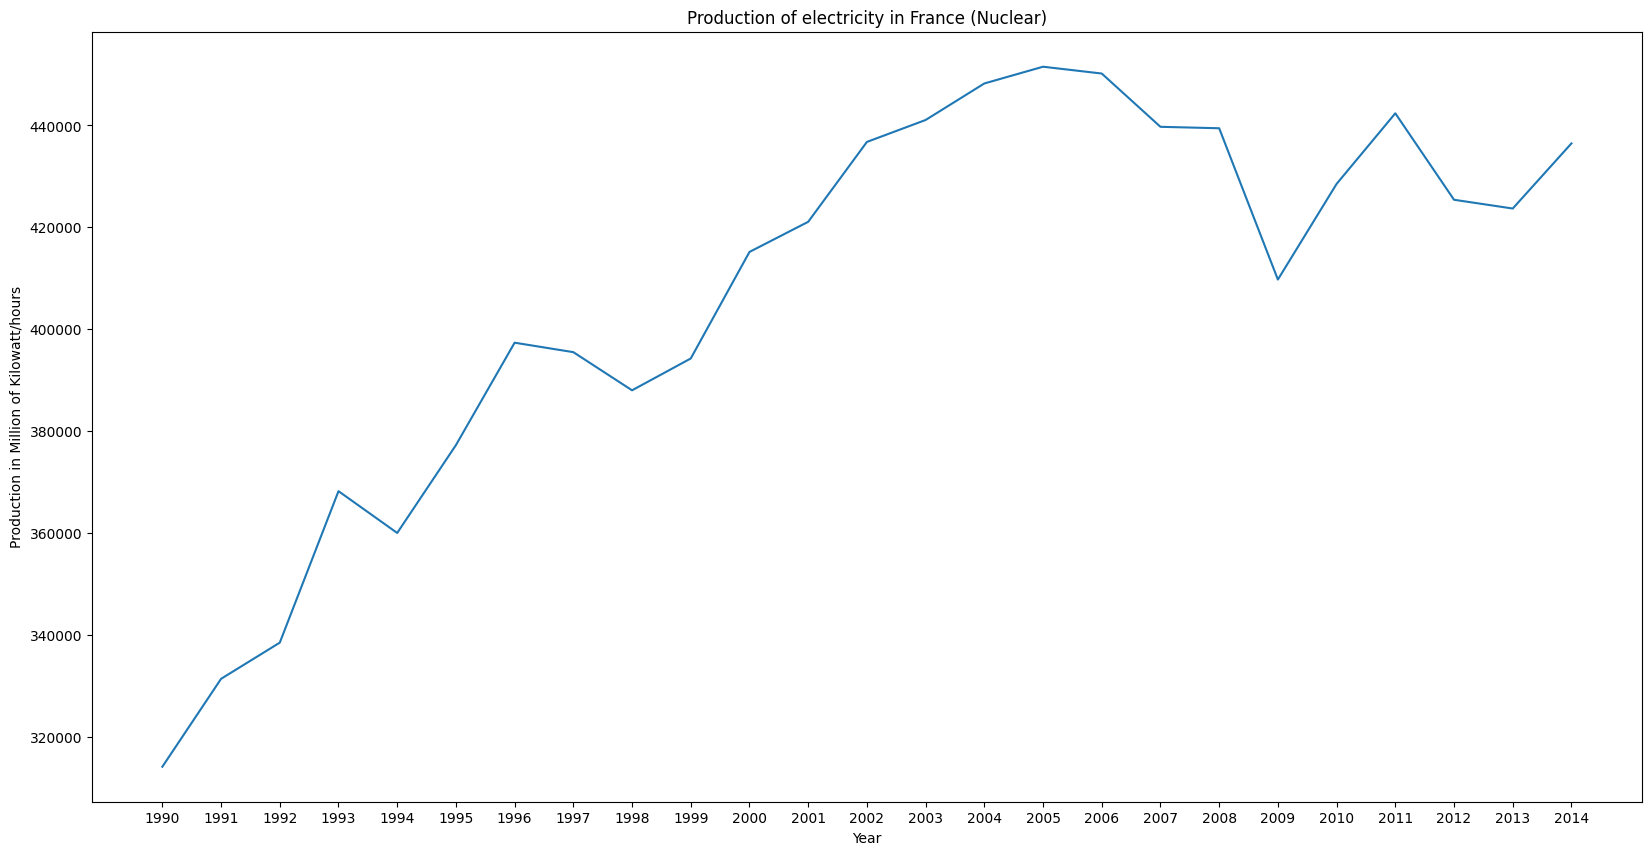

In [147]:
plt.figure(figsize=(20,10))
plt.plot(df_france_nuclear_production.year, df_france_nuclear_production.quantity)
plt.title("Production of electricity in France (Nuclear)")
plt.ylabel("Production in Million of Kilowatt/hours")
plt.xlabel("Year")
plt.xticks(ticks=range(1990,2015))


In [145]:
df_world_nuclear_production = df[df["commodity_transaction"] == 'Electricity - total nuclear production']
df_nuclear_prod_per_country = df_world_nuclear_production.groupby('country_or_area')['quantity'].sum()
df_nuclear_prod_per_country.sort_values(inplace=True, ascending=False)
df_nuclear_prod_per_country = df_nuclear_prod_per_country.reset_index()
df_nuclear_prod_per_country.head(10)
df_ten_most_nuclear_producer_country = df_nuclear_prod_per_country.head(10)
df_ten_most_nuclear_producer_country.sort_values(by='country_or_area', inplace=True)
df_ten_most_nuclear_producer_country

/var/folders/rw/3l7m_pl90hgbgv97f87910n00000gn/T/ipykernel_8208/3399559913.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ten_most_nuclear_producer_country.sort_values(by='country_or_area', inplace=True)


,country_or_area,quantity
6,Canada,2208513.0
1,France,10173734.0
3,Germany,3559664.0
2,Japan,6003543.0
5,"Korea, Republic of",2779927.0
4,Russian Federation,3251955.0
9,Sweden,1682445.0
8,Ukraine,1880329.0
7,United Kingdom,1976385.0
0,United States,19065801.0


Text(0.5, 1.0, 'Sum of Nuclear power generation by 10 most producer country from 1990 to 2015')

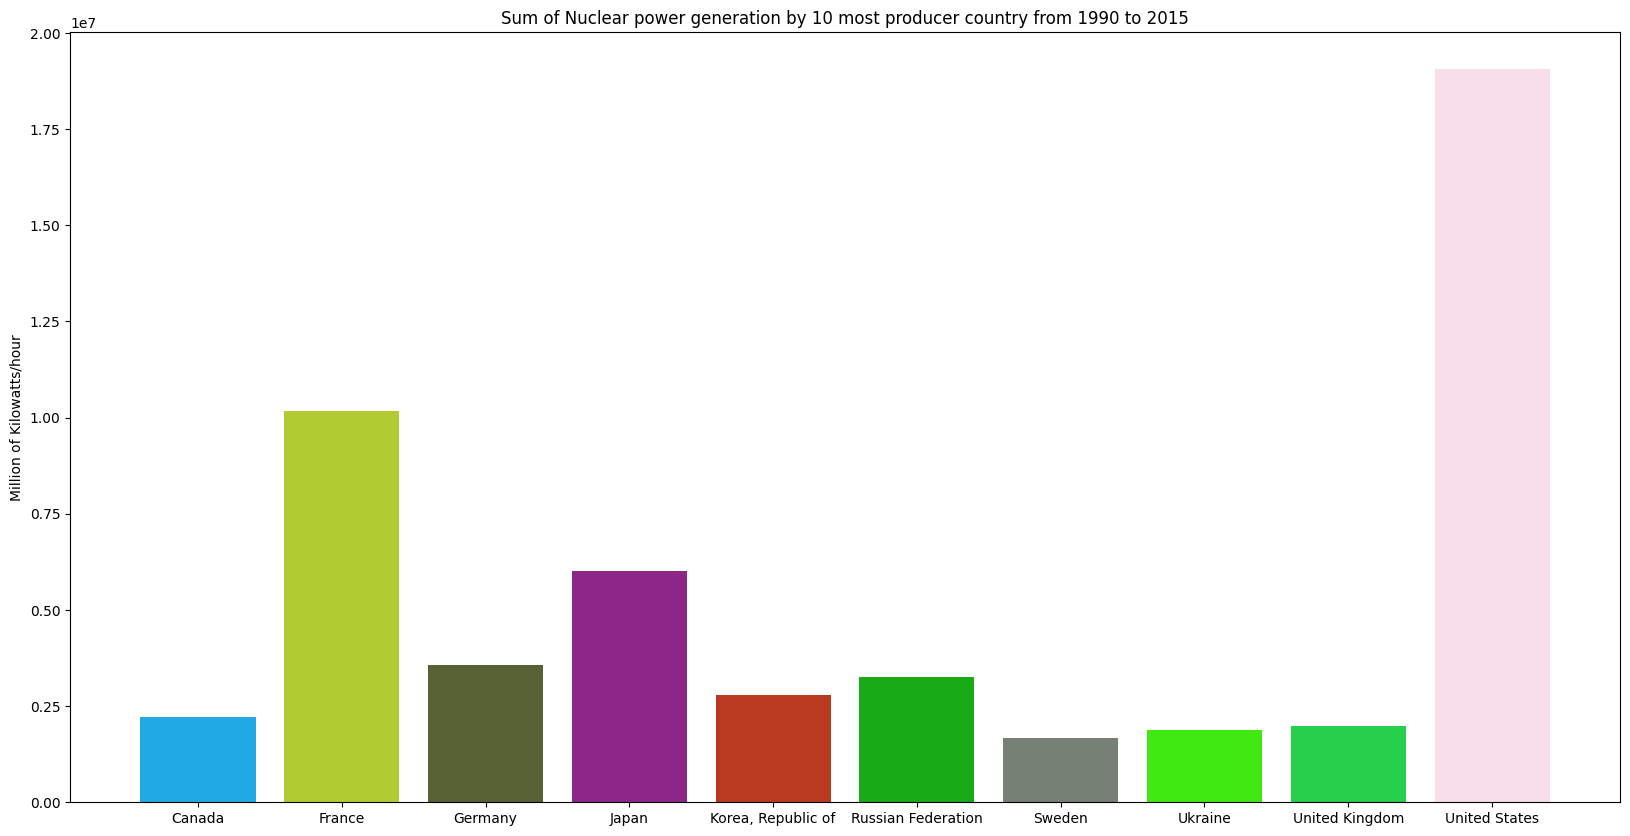

In [146]:
plt.figure(figsize=(20,10))
get_colors = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
get_colors(3) # sample return:  ['#8af5da', '#fbc08c', '#b741d0']
plt.bar(x=df_ten_most_nuclear_producer_country['country_or_area'],height=df_ten_most_nuclear_producer_country['quantity'], color=get_colors(10))
plt.ylabel('Million of Kilowatts/hour')
plt.title("Sum of Nuclear power generation by 10 most producer country from 1990 to 2015")

In [135]:
countries_list = df_ten_most_nuclear_producer_country.country_or_area.unique()
#df_ten_countries_nuclear= df_world_nuclear_production[df_world_nuclear_production['country_or_area'] in ]
ten_most_nuclear_producer = df_world_nuclear_production[df_world_nuclear_production['country_or_area'].isin(countries_list)]
ten_most_nuclear_producer_sort = ten_most_nuclear_producer.sort_values(by=['country_or_area', 'year'])

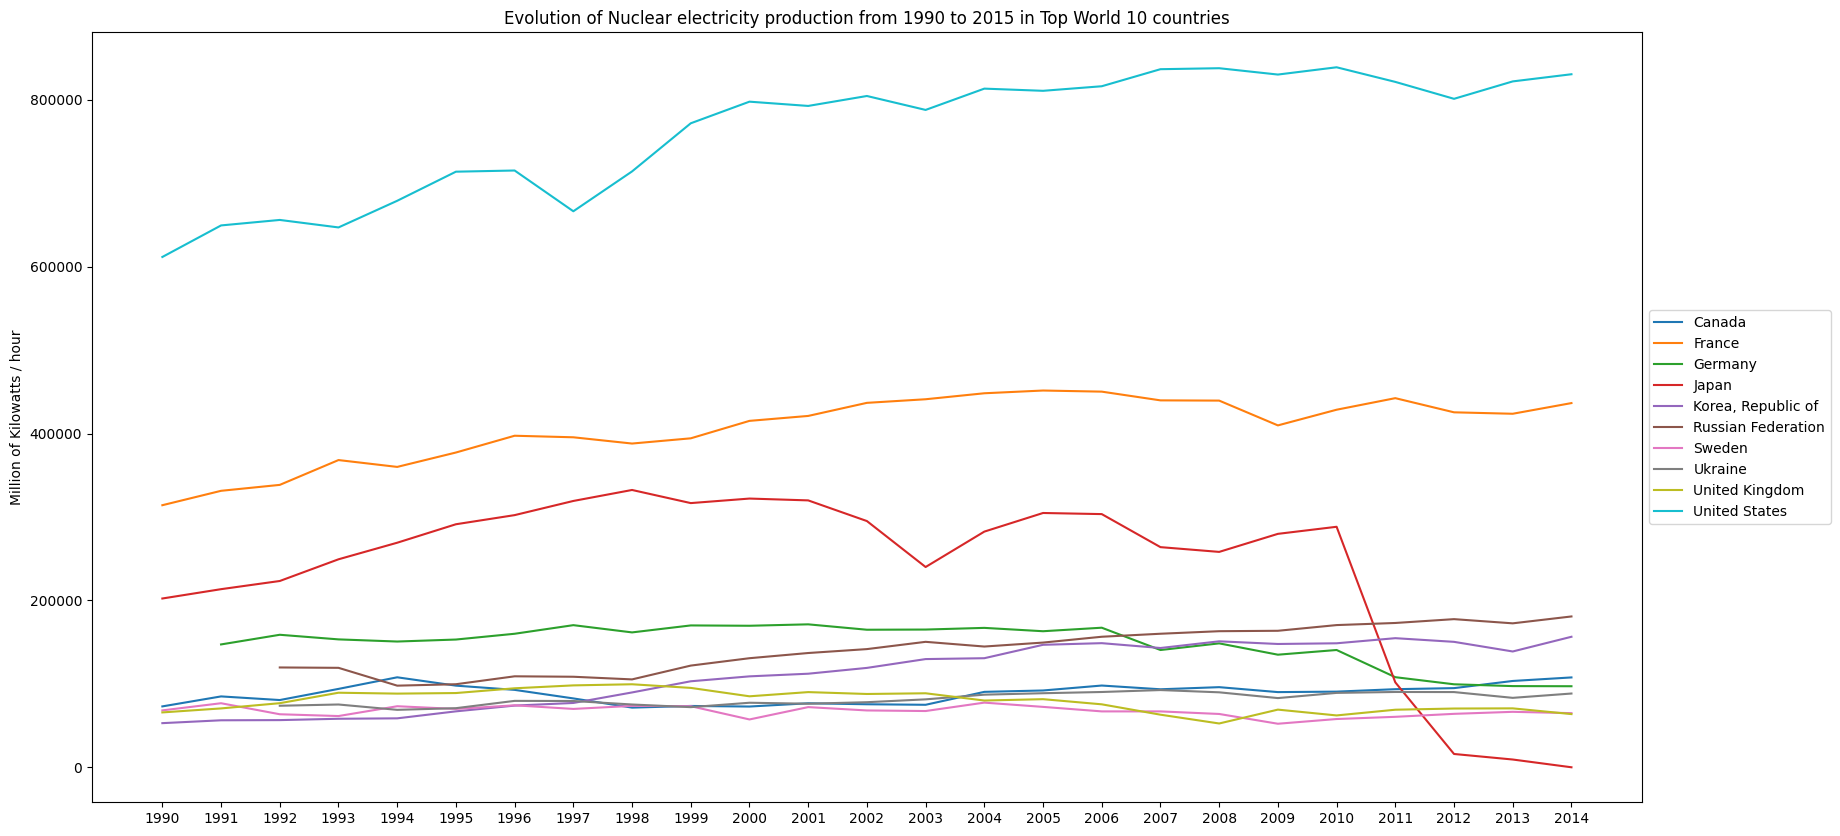

In [148]:
plt.figure(figsize=(20,10))
for country in countries_list:
    condition = ten_most_nuclear_producer_sort['country_or_area'] == country
    plt.plot(ten_most_nuclear_producer_sort[condition].year, ten_most_nuclear_producer_sort[condition].quantity, label=country)
plt.ylabel('Million of Kilowatts / hour')
plt.xticks(ticks=range(1990,2015))
plt.title('Evolution of Nuclear electricity production from 1990 to 2015 in Top World 10 countries')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()